# Part III

# Overview

# Collecting Data

In [78]:
import pandas as pd
import numpy as np

In [79]:
df = pd.read_csv("energy_dataset.csv")

In [80]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [81]:
df.shape

(35064, 29)

In [82]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [83]:
df1 = df.reset_index()['price actual']

In [84]:
import matplotlib.pyplot as plt

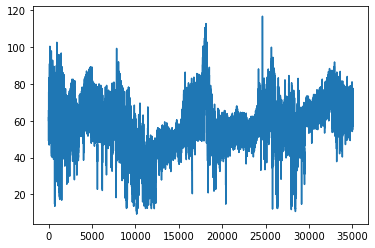

In [85]:
plt.plot(df1)

In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
scaler = MinMaxScaler(feature_range = (0, 1))

In [88]:
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [89]:
df1.shape

(35064, 1)

# Pre-process the Data - Train & Test

In [90]:
training_size = int(len(df1)*0.65)

In [91]:
test_size = len(df1) - training_size 

In [92]:
train_data, test_data = df1[0: training_size], df1[training_size:len(df1),:1]

In [93]:
training_size, test_size

(22791, 12273)

In [94]:
len(train_data), len(test_data)

(22791, 12273)

In [95]:
import numpy as np

In [96]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [97]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [98]:
print(X_train.shape), print(y_train.shape)

(22690, 100)
(22690,)


(None, None)

In [99]:
print(X_test.shape), print(y_test.shape)

(12172, 100)
(12172,)


(None, None)

In [100]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [101]:
X_train.shape

(22690, 100, 1)

In [102]:
X_test.shape

(12172, 100, 1)

# Creating an LSTM Model

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Dropout

In [104]:
model = Sequential()
# First LSTM Layer
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
# Dropout Layer
model.add(Dropout(0.5))
# Second LSTM Layer
model.add(LSTM(50, return_sequences = True))
# Dropout Layer
model.add(Dropout(0.5))
# Third LSTM Layer
model.add(LSTM(50))
# Dropout Layer
model.add(Dropout(0.5))
# Output Layer
model.add(Dense(1))
# Compiling with the Mean Squared Error and the Optimizer is adam
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


In [105]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3, batch_size = 64, verbose = 1)

Epoch 1/3
355/355 [==============================] - 113s 303ms/step - loss: 0.0155 - val_loss: 0.0068
Epoch 2/3
355/355 [==============================] - 123s 347ms/step - loss: 0.0096 - val_loss: 0.0055
Epoch 3/3
355/355 [==============================] - 111s 314ms/step - loss: 0.0072 - val_loss: 0.0038


In [106]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [107]:
train_predict =  scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)


In [108]:
import math
from sklearn.metrics import mean_squared_error
# Train Data RMSE
print(math.sqrt(mean_squared_error(y_train, train_predict)))
# Test Data RMSE
print(math.sqrt(mean_squared_error(y_test, test_predict)))


56.94633523251323
63.570902772646456


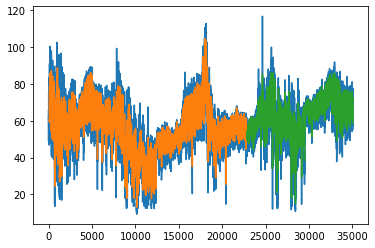

In [109]:
# Plotting 
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
len(test_data)

12273

In [111]:
x_input=test_data[12173:].reshape(1,-1)
x_input.shape

(1, 100)

In [112]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [113]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    



[0.55760217]
101
1 day input [0.63571229 0.59504978 0.59691077 0.57318321 0.55159579 0.51046804
 0.49502187 0.46943333 0.46980553 0.51121243 0.53484693 0.57737043
 0.5922583  0.60481995 0.59104866 0.59039732 0.5686238  0.57076393
 0.55503862 0.57913836 0.60426165 0.64138829 0.63059458 0.59802736
 0.55717875 0.54154648 0.5094445  0.52256444 0.4735275  0.43202754
 0.42430446 0.41723272 0.41704662 0.4192798  0.42960826 0.46012841
 0.52228529 0.53540523 0.51921466 0.51307342 0.50162836 0.47976179
 0.45984926 0.46366428 0.51046804 0.56908905 0.57392761 0.57122918
 0.56769331 0.55196799 0.54880432 0.54015074 0.44998604 0.43677305
 0.42867777 0.42635154 0.42616544 0.42811948 0.43751745 0.45007909
 0.48795013 0.52265749 0.52423932 0.53745231 0.55894668 0.56359914
 0.53633572 0.52247139 0.54778078 0.57783568 0.5865823  0.59570113
 0.59839955 0.58239509 0.55978413 0.54964176 0.47445799 0.45035824
 0.44970689 0.44393784 0.44803201 0.48199498 0.47799386 0.5332651
 0.56760026 0.58425607 0.58137155 

In [114]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [115]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [116]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [117]:
len(df1)

35064

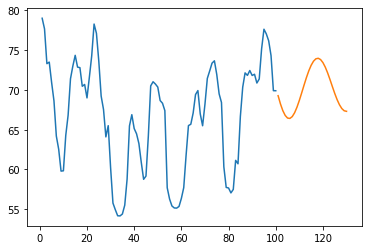

In [118]:
plt.plot(day_new,scaler.inverse_transform(df1[34964:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

# Part IV

In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import itertools
import random
import os


In [124]:
def LSTM_HyperParameter_Tuning(config, x_train, y_train, x_test, y_test):
    
    first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = config
    possible_combinations = list(itertools.product(first_additional_layer, second_additional_layer, third_additional_layer,
                                                  n_neurons, n_batch_size, dropout))
    
    print(possible_combinations)
    print('\n')
    
    hist = []
    
    for i in range(0, len(possible_combinations)):
        
        print(f'{i+1}th combination: \n')        
        first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout = possible_combinations[i]
        regressor = Sequential()
        regressor.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
        regressor.add(Dropout(dropout))

        if first_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if second_additional_layer:
            regressor.add(LSTM(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        if third_additional_layer:
            regressor.add(GRU(units=n_neurons, return_sequences=True))
            regressor.add(Dropout(dropout))

        regressor.add(LSTM(units=n_neurons, return_sequences=False))
        regressor.add(Dropout(dropout))
        regressor.add(Dense(units=1, activation='linear'))
        regressor.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError()])

        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

        file_path = 'bmodel.h5'

        mc = ModelCheckpoint(file_path, monitor='val_loss', mode='min', verbose=1, save_best_only=True)

        regressor.fit(x_train, y_train, validation_split=0.3, epochs=40, batch_size=n_batch_size, callbacks=[es, mc], verbose=0)

        train_accuracy = regressor.evaluate(x_train, y_train, verbose=0)
        test_accuracy = regressor.evaluate(x_test, y_test, verbose=0)

        hist.append(list((first_additional_layer, second_additional_layer, third_additional_layer, n_neurons, n_batch_size, dropout,
                          train_accuracy, test_accuracy)))

        print(f'{str(i)}-th combination = {possible_combinations[i]} \n train accuracy: {train_accuracy} and test accuracy: {test_accuracy}')

    return hist

In [ ]:
config = [[False], [False], [False], [16, 32], [8, 16, 32], [0.2]]  

hist = LSTM_HyperParameter_Tuning(config, X_train, y_train, X_test, y_test)  

In [ ]:
hist = pd.DataFrame(hist)
hist = hist.sort_values(by=[7], ascending=True)
hist

# PART V: Compare Network Performance

In [ ]:
print(f'Best Combination: \n first_additional_layer = {hist.iloc[0, 0]}\n second_additional_layer = {hist.iloc[0, 1]}\n third_additional_layer = {hist.iloc[0, 2]}\n n_neurons = {hist.iloc[0, 3]}\n n_batch_size = {hist.iloc[0, 4]}\n dropout = {hist.iloc[0, 5]}')

print(f'Results After Tunning:\n Test Set RMSE: {np.round(hist.iloc[0, -1], 4)[1]}\n')
